<a href="https://colab.research.google.com/github/kkkonts/coursera-matstat-AB/blob/main/hw02_groceries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Анализируем чеки

В этом задании мы будем работать с покупками и чеками. Смотреть за корреляциями в покупках довольно полезно.

> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

In [6]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-pastel')
%matplotlib inline

Подружаем данные и смотрим как они выглядят.

In [7]:
df = pd.read_csv('groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 1. Корреляции

Для начала поработаем с корреляциями в данных.

__а)__ Какой товар покупался чаще всего? Сохраните название этого товара в переменную `product_name`.

In [8]:
# Формат ответа: строка, пример: 'pip fruit'
# Вокруг ответа не должно быть никаких надписей array(['pip fruit']) или Index('pip fruit')
# Это должна быть именно строка, а не строка в массиве
product_name = df['product'].value_counts().index[0]
product_name
# your code here


'whole milk'

In [9]:
# проверка, что задание решено корректно
assert len(product_name) == 10

# Аналогичные тесты скрыты от вас

__б)__ Сколько всего уникальных заказов было сделано? Сохраните число заказов в переменную `n_cnt`.

In [10]:
# Формат ответа: целое число, пример: 5555
n_cnt = df['id'].value_counts().shape[0]
n_cnt



3898

In [11]:
# проверка, что задание решено корректно
assert n_cnt > 3800
assert n_cnt < 4000

# Аналогичные тесты скрыты от вас

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет.

> Обратите внимание, то здесь задание немного упрощено. Вообще говоря, нам нужно делать агрегацию по паре `fielddate, id`, если мы хотим изучать чеки по-честному. Но мы делаем её только по `id` для того, чтобы не усложнять задание. В качестве необязательного дополнения вы можете после сдачи задания переделать код так, чтобы дата тоже учитывалась при расчётах.

In [12]:
sparse_sales = pd.pivot_table(df,
               values='fielddate',
               index='id',
               columns='product',
               fill_value=0, aggfunc='count')

sparse_sales.head()

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в ином виде.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/)

__в)__ Постройте матрицу корреляций Пирсона. Для этого используйте метод таблицы `.corr`.

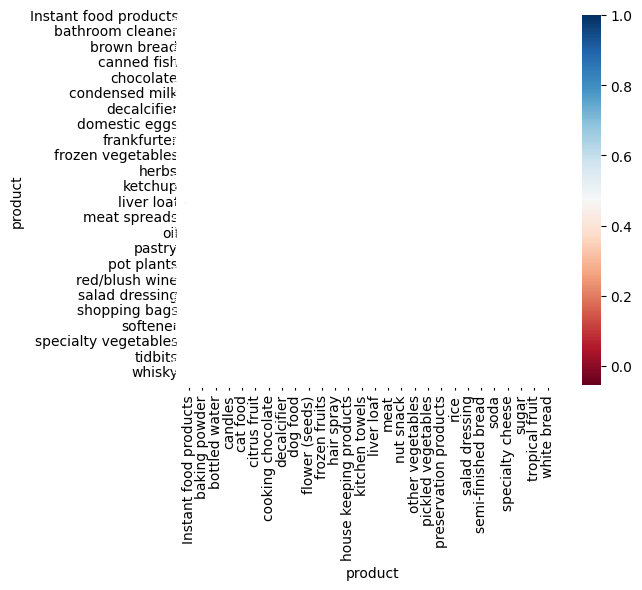

In [13]:
# Формат ответа: таблица pd.DataFrame размера (167, 167)
sales_correlation = sparse_sales.corr(method='pearson')
sns.heatmap(sparse_sales.corr(method='pearson'), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu");

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)?  Сохраните название самого скоррелированного продукта в переменную `top_1`.

In [14]:
# Формат ответа: строка, пример: 'pip fruit'
# Вокруг ответа не должно быть никаких надписей array(['pip fruit']) или Index('pip fruit')
# Это должна быть именно строка, а не строка в массиве
top_1 = sales_correlation['domestic eggs'].sort_values().index[-2]
top_1

'meat spreads'

Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? Сохраните название продукта с самой большой отрицательной корреляцией в переменную `bottom_1`.

In [15]:
# Формат ответа: строка, пример: 'pip fruit'
# Вокруг ответа не должно быть никаких надписей array(['pip fruit']) или Index('pip fruit')
# Это должна быть именно строка, а не строка в массиве
bottom_1 = sales_correlation['domestic eggs'].sort_values().index[0]
bottom_1

'pet care'

In [16]:
# проверка, что задание решено корректно
assert len(bottom_1) == 8
assert len(top_1) == 12

# Аналогичные тесты скрыты от вас

Напишите код, который выводит самые коррелируемые товары для случайного продукта из списка `unique_products`.

In [45]:
unique_products = df['product'].unique()

('soups', 'preservation products')

__г)__ Какие два продукта коррелируют сильнее всего? Положите их название в лист `answer`

In [49]:
# Формат ответа: массив из строк, пример: ['soups', 'apple', 'iphone 18']

answer = sales_correlation.unstack().sort_values(ascending=False).index[sales_correlation.shape[0]]
answer

('soups', 'preservation products')

In [48]:
# проверка, что задание решено корректно
assert 'soups' in answer
# Аналогичные тесты скрыты от вас

Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила.

## 2. Зависимость.

В лекции мы с вами сказали, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности.

__д)__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`). Запишите получившиеся значение метрики в переменную `answer`.

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [91]:
# Формат ответа: действительное чиссло, пример: 3.1418281828
ss = sparse_sales
p_a = np.where(ss['whole milk'] > 0, True, False).mean()
p_b = np.where(ss['domestic eggs'] > 0, True, False).mean()
p_ab = ss[['whole milk', 'domestic eggs']].all(axis=1).mean()
answer = p_ab / p_a / p_b

answer

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', name='product', length=167)

In [85]:
# проверка, что задание решено корректно
assert answer < 3
assert answer > 1

# Аналогичные тесты скрыты от вас

__е)__ Посчитайте значение метрики для всех пар продуктов из датасета. Сохраните значения в словарик `dict`. В качестве ключа используете кортеж из пары продуктов. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.

Чтобы при подсчётах не возникало деления на ноль, добавьте к знаменателю маленькое число, например `1e-10`.

In [99]:
from itertools import combinations
res = {}
def lift(comb):
    for tpl in comb:
        p_a = 1e-10 + np.where(ss[tpl[0]] > 0, True, False).mean()
        p_b = 1e-10 + np.where(ss[tpl[1]] > 0, True, False).mean()
        p_ab = ss[[tpl[0], tpl[1]]].all(axis=1).mean()
        res[tpl] = p_ab / p_a / p_b

lift(combinations(ss.columns, 2))
res

{('Instant food products', 'UHT-milk'): 0.8492374661678654,
 ('Instant food products', 'abrasive cleaner'): 0.0,
 ('Instant food products', 'artif. sweetener'): 0.0,
 ('Instant food products', 'baby cosmetics'): 0.0,
 ('Instant food products', 'bags'): 0.0,
 ('Instant food products', 'baking powder'): 0.5369145953331453,
 ('Instant food products', 'bathroom cleaner'): 0.0,
 ('Instant food products', 'beef'): 1.2547210208418644,
 ('Instant food products', 'berries'): 0.6266880980370312,
 ('Instant food products', 'beverages'): 1.0738291923959544,
 ('Instant food products', 'bottled beer'): 1.154496491503354,
 ('Instant food products', 'bottled water'): 0.8579031552895415,
 ('Instant food products', 'brandy'): 0.0,
 ('Instant food products', 'brown bread'): 0.980628923725566,
 ('Instant food products', 'butter'): 1.0542258205798416,
 ('Instant food products', 'butter milk'): 0.7703557250336563,
 ('Instant food products', 'cake bar'): 2.9198501555083367,
 ('Instant food products', 'candle

Сколько пар продуктов покупали вместе хотя бы раз? Запишите ответ в переменную `answer`.

In [116]:
# Формат ответа: целое число, пример: 5555
tmp_list = []

for key, value in res.items():
    if value:
        tmp_list.append(key)
len(tmp_list)

9824

Для какой пары продуктов метрика $lift$ оказалась самой большой?

In [109]:
max_lift_key = max(res, key=res.get)
max_lift_key

('preservation products', 'soups')

Сколько раз эти продукты встретились в выборке? Как думаете адеватно ли делать выводы по такому объёму данных?

In [110]:
print(np.where(ss[max_lift_key[0]], True, False).sum())
print(np.where(ss[max_lift_key[1]], True, False).sum())

1
48


Для какой пары продуктов метрика оказывается самой маленькой?

In [114]:
min_lift_key = min(res, key=res.get)
min_lift_key

('Instant food products', 'abrasive cleaner')

In [115]:
# проверка, что задание решено корректно

assert answer < 10000
assert answer > 9000

# Аналогичные тесты скрыты от вас

TypeError: ignored

## 3. Неоцениваемые задания

Выше мы увидели, что некоторые продукты встречаются в выборке очень редко. Понятное дело, что по ним у нас не получится построить хорошее ассоциативное правило. Попробуйте повторить расчёт той же метрики, но с условием что продукт покупали больше 10 раз. Изучите самые покупаемые вместе продукты и самые непокупаемые вместе продукты. Насколько сильно список отличается от полученного в предыдущем задании?

In [117]:
from itertools import combinations

res = {}
def lift(comb):
    for tpl in comb:
        na = np.where(ss[tpl[0]] > 0, True, False).sum()
        nb = np.where(ss[tpl[1]] > 0, True, False).sum()

        if na > 10 and nb > 10:
            p_a = 1e-10 + np.where(ss[tpl[0]] > 0, True, False).mean()
            p_b = 1e-10 + np.where(ss[tpl[1]] > 0, True, False).mean()
            p_ab = ss[[tpl[0], tpl[1]]].all(axis=1).mean()
            res[tpl] = p_ab / p_a / p_b

lift(combinations(ss.columns, 2))
res

{('Instant food products', 'UHT-milk'): 0.8492374661678654,
 ('Instant food products', 'abrasive cleaner'): 0.0,
 ('Instant food products', 'artif. sweetener'): 0.0,
 ('Instant food products', 'baking powder'): 0.5369145953331453,
 ('Instant food products', 'bathroom cleaner'): 0.0,
 ('Instant food products', 'beef'): 1.2547210208418644,
 ('Instant food products', 'berries'): 0.6266880980370312,
 ('Instant food products', 'beverages'): 1.0738291923959544,
 ('Instant food products', 'bottled beer'): 1.154496491503354,
 ('Instant food products', 'bottled water'): 0.8579031552895415,
 ('Instant food products', 'brandy'): 0.0,
 ('Instant food products', 'brown bread'): 0.980628923725566,
 ('Instant food products', 'butter'): 1.0542258205798416,
 ('Instant food products', 'butter milk'): 0.7703557250336563,
 ('Instant food products', 'cake bar'): 2.9198501555083367,
 ('Instant food products', 'candles'): 0.0,
 ('Instant food products', 'candy'): 0.6187301535619942,
 ('Instant food products'

In [120]:
max_lift_key = max(res, key=res.get)
max_lift_key
max(res)

('yogurt', 'zwieback')

In [121]:
min_lift_key = min(res, key=res.get)
min_lift_key
min(res)

('Instant food products', 'UHT-milk')

Иногда в чеках пытаются искать __продукты-якоря.__ То есть продукты, которые являются основными. Например: айфон - основной продукт, наушники и чехол - дополнения к нему. Подумайте как можно попытаться найти такие продукты на основе простых метрик, основанных на подсчёте условных вероятностей.

<center>
<img src="https://pp.userapi.com/c638028/v638028181/52e5e/1X-dkzNN1hk.jpg" width="400">
</center>